# Basketball YOLOv5
Dataset obtained:

https://universe.roboflow.com/roboflow-universe-projects/basketball-players-fy4c2/dataset/25

With YOLOv5 Pytorch dataset downloaded

## Librerías iniciales

### Para limpiar el caché

In [1]:
#Para limpiar caché
!find . -name "*.pyc" -delete
!find . -name "__pycache__" -type d -exec rm -r {} +

### Importamos librerías

In [2]:
#Ultralytics update
!pip install -U ultralytics

In [3]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Estilo de gráficos a utilizar
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## Plotting random train samples

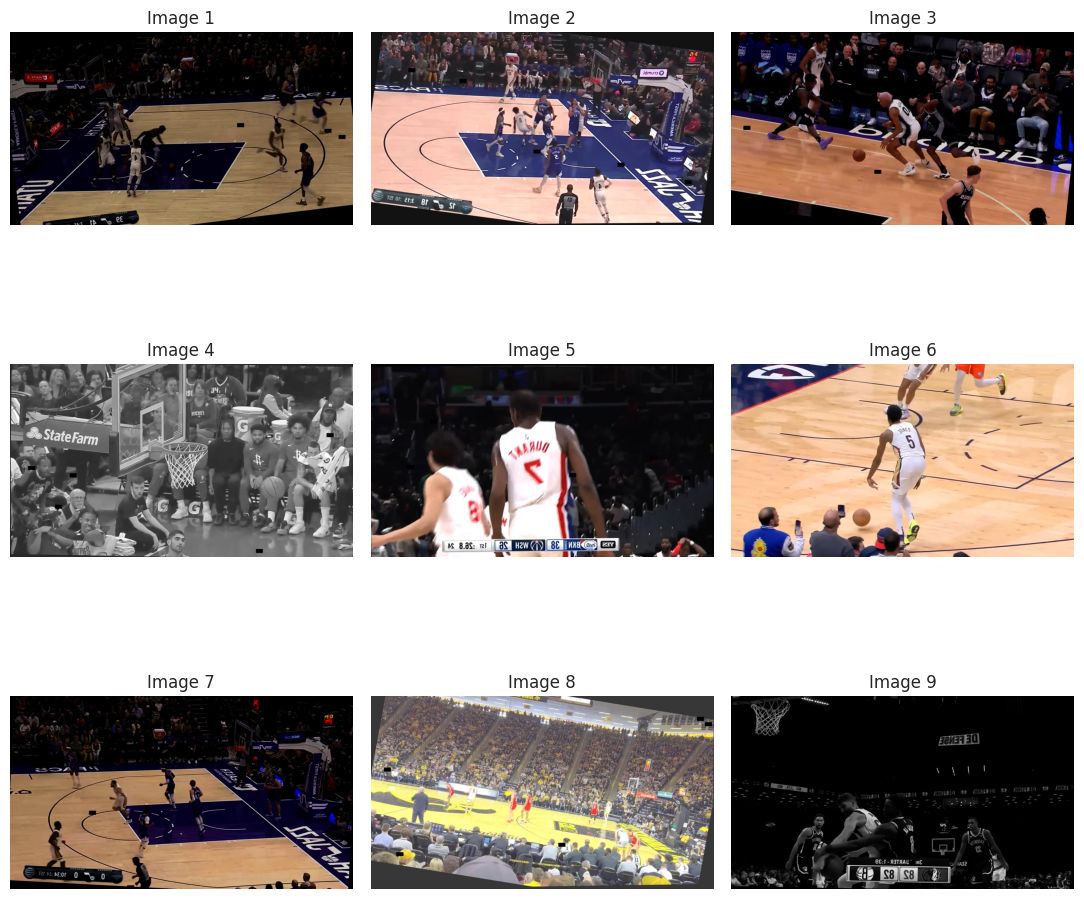

In [5]:
#Image directory for train samples
Image_dir = '/home/alide/Documentos/IA/Proyecto/BasketballYv5/train/images'

#To show samples
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images for plotting
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## YOLOv5 Training

In [6]:
# Use a pretrained YOLOv5nu model
model = YOLO("yolov5nu.pt") 


image 1/1 /home/alide/Documentos/IA/Proyecto/BasketballYv5/train/images/youtube-33_jpg.rf.2c1364f4a4f18c0e838461fb565d14ba.jpg: 384x640 17 persons, 1 frisbee, 1 sports ball, 98.6ms
Speed: 2.4ms preprocess, 98.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


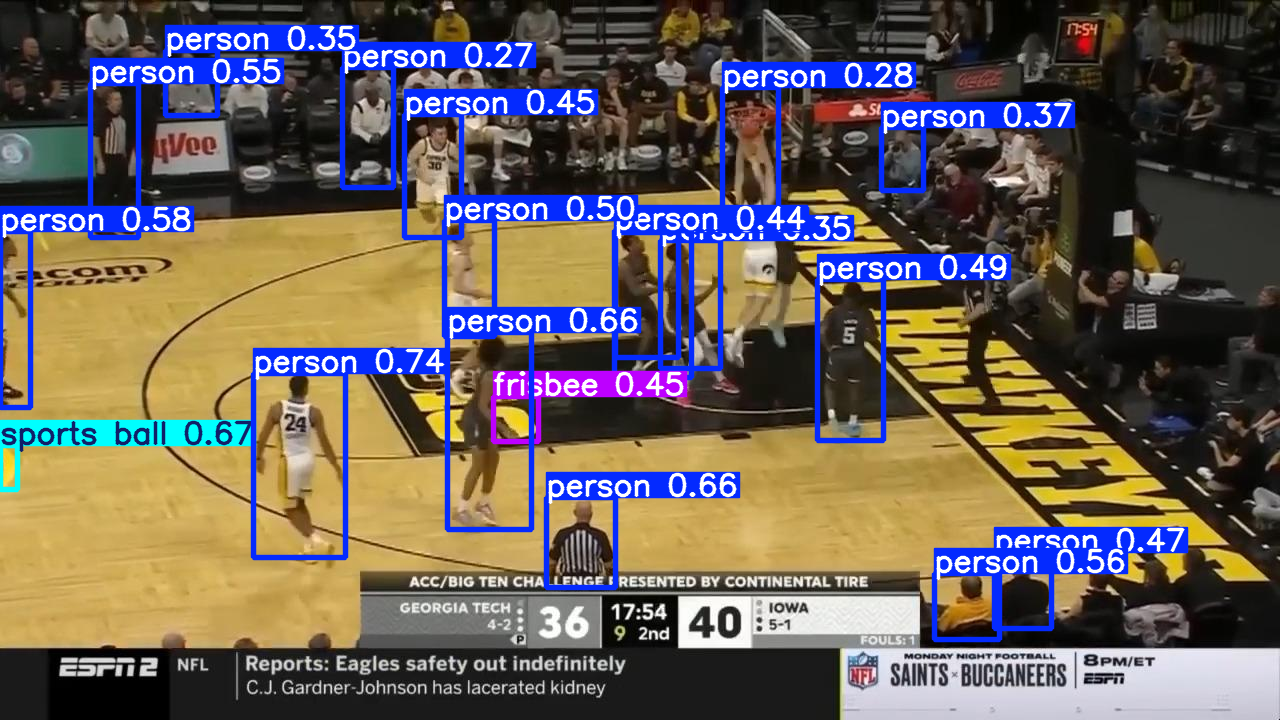

In [7]:
# Use the model to detect object
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv5/train/images/youtube-33_jpg.rf.2c1364f4a4f18c0e838461fb565d14ba.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [8]:
# Build from YAML and transfer weights
Training_model = YOLO('yolov5nu.pt')

In [ ]:
#Training
Result_Training_model = Training_model.train(data="/home/alide/Documentos/IA/Proyecto/BasketballYv5/data.yaml",
                                             epochs = 100, batch = 4, optimizer = 'auto')

Ultralytics 8.3.104 🚀 Python-3.10.16 torch-2.6.0+cu124 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/home/alide/Documentos/IA/Proyecto/BasketballYv5/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning /home/alide/Documentos/IA/Proyecto/BasketballYv5/train/labels...


train: New cache created: /home/alide/Documentos/IA/Proyecto/BasketballYv5/train/labels.cache


val: Scanning /home/alide/Documentos/IA/Proyecto/BasketballYv5/valid/labels... 3

val: New cache created: /home/alide/Documentos/IA/Proyecto/BasketballYv5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G       1.87      2.555      1.377        110        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.685      0.301      0.278      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.597      1.511      1.225        148        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.558      0.502       0.54      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       1.53      1.289       1.19        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.645      0.531      0.607      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.481      1.215      1.176         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477       0.67      0.636      0.661      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.439      1.124      1.148        110        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.785      0.639      0.708      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.391      1.056      1.127         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.653      0.668      0.668        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.376      1.007      1.121        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.764      0.704      0.742      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.353     0.9673      1.104        168        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.829      0.686      0.754      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.321     0.9336      1.087        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.754      0.743      0.751      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.304     0.9026      1.082         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.741      0.786      0.792      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G       1.29     0.8812      1.079         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.781      0.743      0.782      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.271     0.8605      1.069         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.825      0.754      0.794      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.253     0.8392      1.057        145        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.823      0.771      0.807      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.245     0.8181      1.054         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.841      0.728      0.799      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.219     0.8039      1.046        106        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477       0.77      0.787      0.804      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G       1.21     0.7915       1.04         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.771      0.781      0.809      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.223     0.7841      1.045        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.857       0.78      0.831      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.201     0.7631      1.032        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.783      0.787       0.81       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.246     0.7715       1.05        140        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.773      0.821      0.843      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.184     0.7378      1.027         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477        0.8      0.784      0.822      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.172     0.7366      1.026         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.888      0.783       0.83      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.164     0.7279       1.02        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.818      0.803      0.832      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.184     0.7314      1.028         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477       0.84      0.806      0.839      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.145     0.7044      1.009        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         32        477      0.832      0.805      0.849      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.119     0.6738      1.003         89        640:  

## Post-training Results

In [ ]:
#Function for showing results
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Could not read image: {image_path}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/home/alide/Documentos/IA/Proyecto/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

## Best performing model and example

In [ ]:
# Loading the best performing model
Final_model = YOLO('/home/alide/Documentos/IA/Proyecto/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Final_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

### Exporting the model

In [ ]:
#Install dependencies
!pip install onnx
!pip install onnxruntime

In [ ]:
#Export the model
Final_model.export(format='onnx')

### Example using Final_Model with the same img used with the pre trained model

In [ ]:
image = "/home/alide/Documentos/IA/Proyecto/BasketballYv5/train/images/youtube-33_jpg.rf.2c1364f4a4f18c0e838461fb565d14ba.jpg"
result_predict = Final_model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FInal Model architecture

In [ ]:
Final_model